#####  Histograms in OpenCV

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

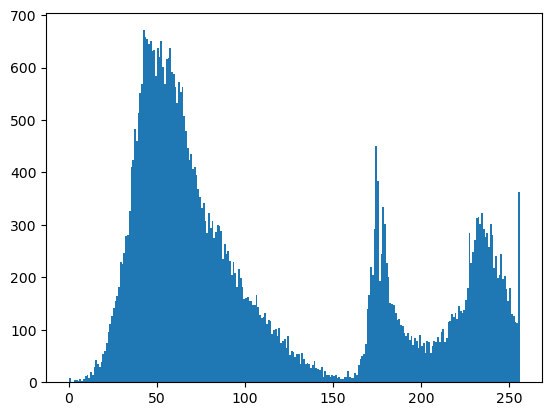

In [3]:
img = cv2.imread('ee.jpg',0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [4]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

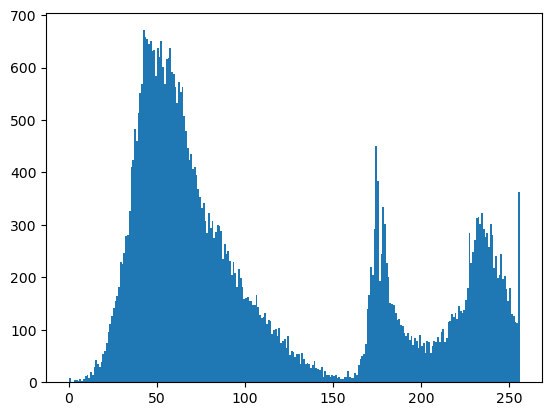

In [7]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

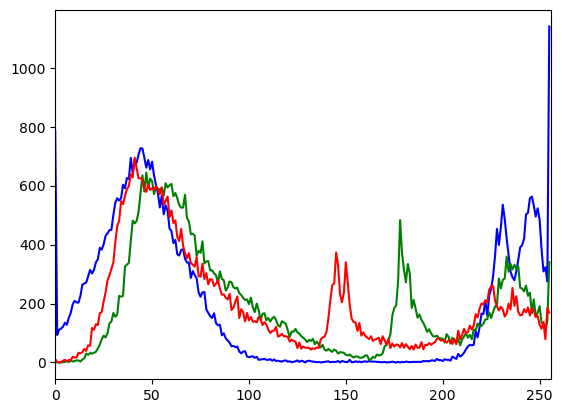

In [8]:
img = cv2.imread('ee.jpg')

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

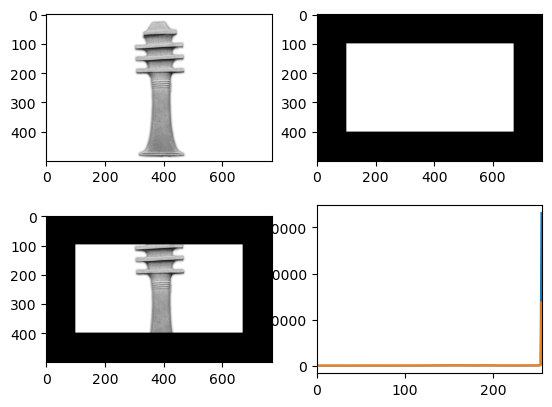

In [20]:
img = cv2.imread('Djed.jpg',0)
 # create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:400, 100:670] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 # Calculate histogram with mask and without mask
 # Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

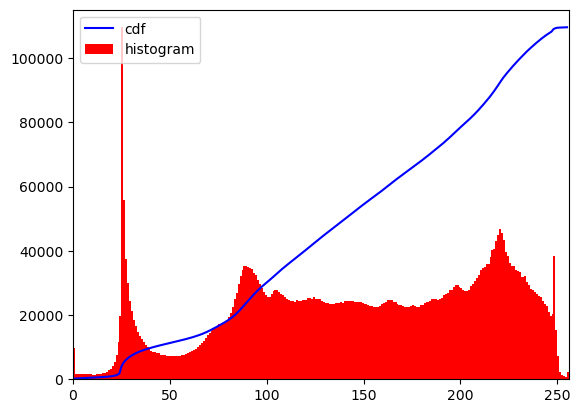

In [33]:
img = cv2.imread('beach-clouds-daytime-994605.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [34]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [35]:
img2 = cdf[img]

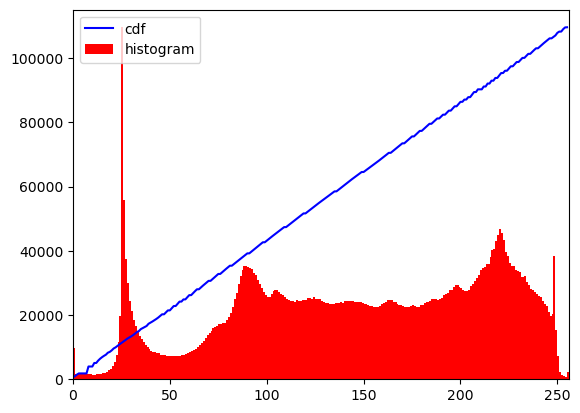

In [44]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

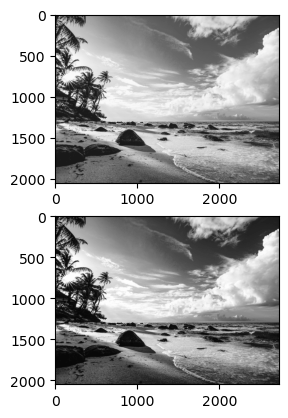

In [45]:
plt.subplot(211), plt.imshow(img,'gray')
plt.subplot(212), plt.imshow(img2,'gray')
plt.show